In [ ]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
#Functions for regression models
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
import csv
from sklearn import datasets
import scipy
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import dummy
from sklearn import svm
from sklearn import model_selection
from sklearn import neighbors, metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
from sklearn.cluster import KMeans

#Functions for Neural Network
from random import shuffle
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

Dans un premier temps, nous allons juste vérifier l'affichage des données.

In [ ]:
yt = pd.read_csv("/content/challenge_youtube_toxic.csv", sep=';', encoding = 'unicode_escape')
yt #affichage du tableau de valeur

FileNotFoundError: ignored

In [ ]:
yt_test = pd.read_csv("/content/random_essai.csv", sep=';', encoding = 'unicode_escape')
yt_test #affichage du tableau de valeur

,ï»¿nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,cat_inst,nbrMotInsulte.1,0,1,2,3,4,5,6,7,8,09,10 14,15 20,20 30,30 50,50 100,100 150,150 200,200 300,300 500,"500, 1000","1000, 1500","1500, 2000","2000, , 3000",3000 et plus,grp_insulte
0,3813.0,18.0,4.0,145.0,79.0,60.0,45.0,81.0,126.0,28.0,58.0,47.0,23.0,0.0,18.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,28.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,1.0,0.0,1.0,2.0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3804.0,68.0,9.0,56.0,75.0,54.0,52.0,86.0,138.0,22.0,83.0,49.0,36.0,0.0,68.0,0,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,4.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,737.0,3.0,1.0,18.0,5.0,6.0,17.0,6.0,23.0,4.0,18.0,7.0,7.0,3.0,3.0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46098,228.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46099,287.0,2.0,0.0,3.0,2.0,0.0,8.0,0.0,8.0,0.0,7.0,5.0,3.0,1.0,2.0,0,2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
46100,176.0,0.0,0.0,0.0,6.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,1.0,3.0,0.0,0,0,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
46101,16608.0,152.0,66.0,335.0,177.0,179.0,267.0,471.0,738.0,48.0,440.0,278.0,141.0,0.0,152.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


Nous allons maintenant effectuer un elagage des données inutiles puis, en utilisant un tableau croisé dynamique, essayer de trouver des premiers liens entre les différentes données. 

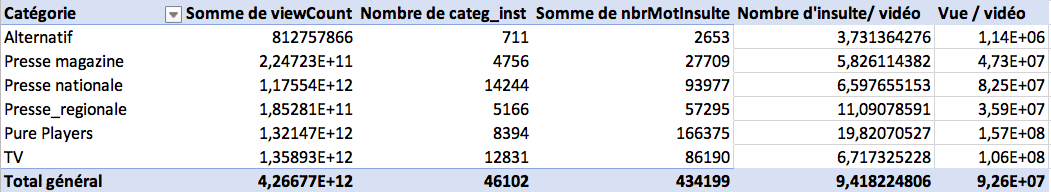

Ainsi, instinctivement, nous avons regardé le nombre d'insulte par vidéo en fonction de la catégorie de chaine. La différence entre ces catégories est très présente, avec par exemple 20 insultes en moyenne pour les "Pure Players" contre 3,7 pour les "Alternatif".

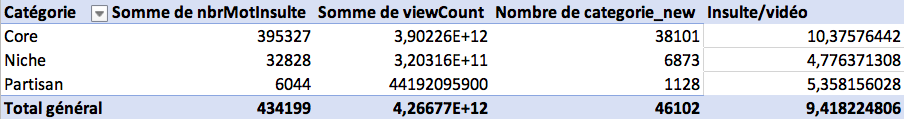

Logiquement, nous avons trié par le 2ème type de catégorie afin d'obtenir les 3 sous-groupe Core, Niche et partisan. Nous remarquons une assez grande proximité entre Niche et Partisan, mais le double d'insulte par vidéo pour Core qui se situe à une moyenne de 10 insultes par vidéo. On va tracer cela pour le mettre en lumière à l'aide d'une colormap. 

In [ ]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)


In [ ]:
yt2 = yt.drop(yt.columns[-1], axis='columns')


On remarque que la dernière colonne n'a pas de sens (comme précisé dans l'énoncé), donc, on la supprime en créant un nouveau dataframe sans elle. 

In [ ]:
corr = yt2.corr()

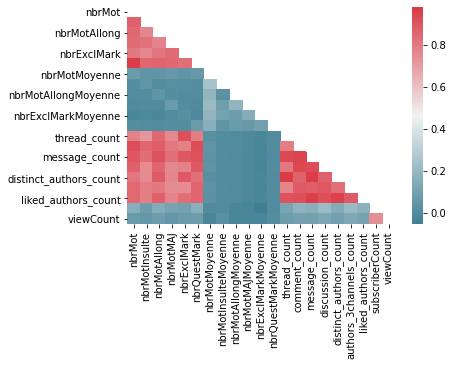

In [ ]:
plot_corr(corr)

In [ ]:
yt.corr(method = 'pearson')

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,subscriberCount,viewCount,cat_inst
nbrMot,1.000000,0.871491,0.851083,0.843185,0.804115,0.972784,0.075012,0.014323,0.006139,-0.001154,-0.015492,0.012033,0.775471,0.924695,0.902798,0.868923,0.813164,0.851122,0.848354,0.158753,0.073630,-0.056210
nbrMotInsulte,0.871491,1.000000,0.766110,0.819455,0.763175,0.854249,0.041867,0.048479,0.004033,-0.000518,-0.009884,0.007036,0.718392,0.853120,0.834391,0.753119,0.750171,0.788718,0.778689,0.083189,0.057689,-0.058446
nbrMotAllong,0.851083,0.766110,1.000000,0.771871,0.811619,0.863186,0.044013,0.009013,0.046536,-0.001104,-0.016591,0.006716,0.851238,0.877789,0.914577,0.856128,0.886172,0.800444,0.872195,0.147688,0.087024,-0.050628
nbrMotMAJ,0.843185,0.819455,0.771871,1.000000,0.840114,0.847969,0.061648,0.021611,0.011895,0.072984,0.001784,0.012878,0.756191,0.810282,0.829444,0.761325,0.765811,0.749355,0.774137,0.108263,0.052209,-0.043889
nbrExclMark,0.804115,0.763175,0.811619,0.840114,1.000000,0.828670,0.043702,0.016170,0.005082,0.004082,0.025775,0.010112,0.923592,0.782705,0.897822,0.777075,0.895811,0.752613,0.837072,0.101257,0.073049,-0.047569
nbrQuestMark,0.972784,0.854249,0.863186,0.847969,0.828670,1.000000,0.064006,0.014444,0.006417,-0.001331,-0.012982,0.073284,0.794312,0.927122,0.913574,0.892087,0.826027,0.858038,0.855924,0.161235,0.083303,-0.057594
nbrMotMoyenne,0.075012,0.041867,0.044013,0.061648,0.043702,0.064006,1.000000,0.246022,0.191381,0.211840,0.189722,0.164161,0.022034,0.040467,0.033555,0.040151,0.022702,0.039169,0.027965,-0.002300,-0.020891,-0.040504
nbrMotInsulteMoyenne,0.014323,0.048479,0.009013,0.021611,0.016170,0.014444,0.246022,1.000000,0.029562,0.088727,0.111746,0.045457,0.003919,0.006060,0.005335,0.002530,0.001441,0.006877,0.001683,-0.001969,0.024727,-0.071794
nbrMotAllongMoyenne,0.006139,0.004033,0.046536,0.011895,0.005082,0.006417,0.191381,0.029562,1.000000,0.192410,0.087105,0.074788,0.002171,0.003152,0.002841,0.002141,0.002388,0.001259,0.002199,-0.024546,-0.024923,0.005227
nbrMotMAJMoyenne,-0.001154,-0.000518,-0.001104,0.072984,0.004082,-0.001331,0.211840,0.088727,0.192410,1.000000,0.155056,0.066535,-0.005773,-0.007814,-0.007239,-0.009953,-0.008268,-0.008217,-0.009091,-0.027613,-0.018647,-0.009215


Dans un premier temps, on va détailler et expliquer certaines corrélations entre les variables.  On regarde les données dans la colonne 2 nbrMotInsulte. 

Le nombre d’insultes est corrélée avec le nombre de mot et les paramètres liés (comment_count, thread_count, message_count, …) car plus une vidéo compte de mot dans ces commentaires plus elle est susceptible d’avoir été à l’origine d’un débat. Avec le nombre de points d’interrogations, ces 2 critères témoignent de la présence d’un débat dans les commentaires et sur Youtube ces derniers finissent souvent par des insultes. Ceci explique la corrélation forte entre le nombre d’insulte et ces 2 paramètres.

De plus, les paramètres représentant le nombre de mots allongés, le nombre de mots en majuscule et le nombre de points d’exclamation montrent souvent de fortes réactions provoquées par la vidéo. Ces fortes réactions peuvent être positives ou négatives mais dans le cas où elles sont le plus importantes et virulentes sont souvent lors de réactions négatives d’où la présence d’insultes. Ceci explique la forte corrélation de ces variables sur le nombre d’insultes dans les commentaires.

De plus, comme on l’a vu précédemment les catégories de vidéo et donc de la chaîne youtube ont une influence. D’où la corrélation avec les paramètres liés à la chaîne youtube et à l’auteur.

La fonction plot_corr nous permet de visualiser un aperçu d'un lien potentiel qui existerait entre les données. Certains arguments sont logiques, très évident, ce qui nous questionne sur la pertinence de ces indicateurs(par exemple, moins il y a de vues, moins il y a de mots).
Le problème est que les nombres à virgule ne sont pas compris comme des nombres par Python. On va donc modifier le fichier .csv pour transformer les virgules par des points.  

On garde les paramètres de corrélation supérieur à 0.5 pour notre algorithme suivant.
On veut prédire le nombre d'insulte dans les vidéos à partir de nos données.  
On a vu que le type de magazine intervenait dans le nombre d'insultes, ainsi on a décidé de créer une nouvelle variable nommée cat_inst, où le nom de la catégorie est remplacé par un nombre entr 0 et 5 (0 = pure players, 1 = TV, 2 = Presse_régionale, 3 = Presse nationale, 4 = Presse magazine, 5 = Alternatif

# Préparation des données pour leur appliquer des méthodes de regression

On va séparer le data set en une portion train et une portion test. Avant cela nous allons supprimer les colonnes qui ne sont pas pertinentes (channel_name, channel_id, video_id, video_id_court ...) et nous allons transformer le type des colonnes categ_inst et categorie_new pour passer d'un objet à un int. Cela va alors nous permettre d'y voir plus clair sur les données que nous voulons étudier, de nous focaliser sur ce qui nous intéresse et de pouvoir traiter les colonnes de type objet que l'on veut traiter.

In [ ]:
datac = pd.read_csv("challenge_youtube_toxic_celia.csv",sep=";",encoding='unicode_escape')

#on supprime les colonnes de type Object non pertinentes

ytbc = datac.drop(['video_id_court'], axis=1)
ytb2c = ytbc.drop(['video_id'], axis=1)
ytb3c = ytb2c.drop(['channel_id'], axis=1)
ytb4c = ytb3c.drop(['channel_name'], axis=1)

#on remplace les valeurs dans les colonnes categ_inst et categorie_new
categ_insta = ytb4c[["categ_inst"]]
ordinal_encoder = OrdinalEncoder()
categ_insta_encoded = ordinal_encoder.fit_transform(categ_insta)
# pour avoir acces aux catégories liées aux chiffres : ordinal_encoder.categories_
ytb5c = ytb4c.drop(['categ_inst'], axis=1)
ytb5c.insert(2,'categ_inst_encoded',categ_insta_encoded)

categ_new=ytb5c[["categorie_new"]]
categ_new_encoded = ordinal_encoder.fit_transform(categ_new)
ytb6c = ytb5c.drop(['categorie_new'], axis=1)
ytb6c.insert(20,'categ_new_encoded',categ_new_encoded)

#maintenant on sépare le dataset en train et en test

trainc=ytb6c.sample(frac=0.8,random_state=123) #must set a seed value in random_state option 
testc=ytb6c.drop(trainc.index)

In [ ]:
Ytrainc = trainc.iloc[:, -1] # last column 
Xtrainc = trainc.iloc[:,:-1] # all columns before the last
Ytestc = testc.iloc[:, -1] # last column 
Xtestc = testc.iloc[:,:-1] # all columns before the last

# Logistic regression

On va utiliser la méthode de régression logistique pour obtenir un modèle qui prédit le nombre d'insultes d'une vidéo youtube.


Nous allons maintenant appliquer la méthode de régression logistique sur la portion train de notre dataset modifié.
Le paramètre que nous souhaitons prédire est nbrMotInsulte (colonne placée à la dernière position de notre dataset). On va au préalable standardiser notre dataset pour limiter l'étendue du jeu de données

In [ ]:
stds = preprocessing.StandardScaler()
Xtrain_stdc = stds.fit_transform(Xtrainc)
print(scipy.stats.describe(Xtrain_stdc,axis=0,ddof=0))

DescribeResult(nobs=36882, minmax=(array([-0.20287917, -0.18997171, -2.18191998, -0.19569639, -0.19267676,
       -0.21212945, -0.78922796, -0.42485702, -0.2546978 , -0.19127463,
       -0.39419429, -0.28804429, -0.18335488, -0.2111825 , -0.21140955,
       -0.26591753, -0.20260145, -0.2704078 , -0.22628532, -1.4427318 ,
       -0.43502789, -1.36610468]), array([ 41.74992577,  56.28543152,   1.24917435,  53.77047685,
        70.41591232,  36.76106787,  41.19747654,  31.04941707,
        86.51884263,  49.43163923,  64.34835668, 124.7723636 ,
        76.09474126,  40.89550327,  47.08289313,  46.57425306,
        63.08538599,  30.81237161,  50.21993481,   3.3136543 ,
         3.92790848,   2.19192009])), mean=array([-8.66938428e-18, -6.35754847e-18, -1.14435873e-16,  1.50269328e-17,
        1.61828507e-17, -8.47673130e-18,  3.23657013e-17,  2.11918282e-17,
       -7.39305826e-18, -2.17697872e-17,  3.08244774e-17,  3.67967200e-17,
       -1.84946865e-17,  2.98612125e-18, -3.66040670e-18, -

Après avoir standardisé nos données, on veut afficher les coefficients déterminés par notre programme pour notre modèle de régression logistique : 

In [ ]:
regLR = LogisticRegression(penalty='none')
regLR.fit(Xtrain_stdc,Ytrainc)
print(pd.DataFrame({"var":Xtrainc.columns,"coef":regLR.coef_[0]})) #on affiche les coefficients estimés

                        var       coef
0                    nbrMot  -5.856788
1              nbrMotAllong  -2.434308
2        categ_inst_encoded  -1.557356
3                 nbrMotMAJ  -1.848409
4               nbrExclMark  -6.621187
5              nbrQuestMark  -7.018533
6             nbrMotMoyenne   1.443261
7      nbrMotInsulteMoyenne -70.675775
8       nbrMotAllongMoyenne   0.867688
9          nbrMotMAJMoyenne   2.211295
10       nbrExclMarkMoyenne   1.268346
11      nbrQuestMarkMoyenne   1.182891
12             thread_count  -4.428408
13            comment_count  -1.984982
14            message_count  -3.393418
15         discussion_count  -0.957838
16   distinct_authors_count  -1.987096
17  authors_3channels_count  -7.226333
18      liked_authors_count   0.118519
19          subscriberCount   1.743629
20        categ_new_encoded  -0.744949
21                viewCount  -0.702321


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Maintenant que nous avons eu des résultats sur la portion train de notre dataset, on va alors appliquer ce modèle à la portion test du dataset :

In [ ]:
Xtest_stdc = stds.transform(Xtestc)
print(scipy.stats.describe(Xtest_stdc,axis=0,ddof=0))

DescribeResult(nobs=9220, minmax=(array([-0.20287917, -0.18997171, -2.18191998, -0.19569639, -0.19267676,
       -0.21212945, -0.78922796, -0.42485702, -0.2546978 , -0.19127463,
       -0.39419429, -0.28804429, -0.18335488, -0.2111825 , -0.21140955,
       -0.26591753, -0.20260145, -0.2704078 , -0.22628532, -1.4427318 ,
       -0.43502789, -1.36610468]), array([ 94.31296114,  67.52312818,   1.24917435, 130.06433273,
        99.71307308,  86.67252325,  39.78184479,  24.30492976,
        21.43868731,  53.04655349,  30.73203213,  56.15744002,
        70.91520261,  92.27059951,  87.58843129,  65.02483944,
        72.30766581,  70.94360933,  77.37688595,   3.3136543 ,
         3.92790848,   2.19192009])), mean=array([ 0.00936187,  0.00048357, -0.00849662,  0.02210329,  0.01933128,
        0.00898474, -0.01585388,  0.00219369, -0.02071313,  0.00237645,
        0.0019225 , -0.01026717,  0.00991556,  0.00565863,  0.00826551,
        0.00268357,  0.00896404,  0.02062498,  0.00954379, -0.0153297

A présent, on aimerait pouvoir déterminer quelle précision on obtient pour notre prédiction du nombre de mot insulte de la portion test du dataset :

In [ ]:
YpredLR = regLR.predict(Xtest_stdc)
print(metrics.classification_report(Ytestc,YpredLR))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5090
           1       0.54      0.80      0.65      1007
           2       0.21      0.31      0.25       622
           3       0.09      0.06      0.07       337
           4       0.17      0.08      0.10       263
           5       0.08      0.05      0.06       202
           6       0.07      0.06      0.07       143
           7       0.07      0.04      0.05       120
           8       0.12      0.10      0.11        99
           9       0.06      0.02      0.03        82
          10       0.04      0.04      0.04        73
          11       0.00      0.00      0.00        70
          12       0.03      0.01      0.02        67
          13       0.05      0.04      0.04        50
          14       0.00      0.00      0.00        35
          15       0.13      0.05      0.07        39
          16       0.00      0.00      0.00        37
          17       0.05    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Finalement, cette méthode nous permet de prédire le nombre de mot insulte de la portion test de notre dataset avec une accuracy de 67%.

In [ ]:
final_mse = mean_squared_error(Ytestc, YpredLR)
final_rmse = np.sqrt(final_mse)
final_rmse

78.18158406407417

On a un écart en moyenne de 78,18 mots dans la prédiction (ce qui en fait donc une mauvaise prédiction mais cela peut être liée aux outliers qui sont très pris en compte par la méthode mean squarred error)

In [ ]:
final_mae = mean_absolute_error(Ytestc, YpredLR)
final_mae

5.416702819956616

On a un écart en moyenne de 5,41 mots dans la prédiction (la métrique de MAE prend moins en compte les outliers que la MSE ce qui montre que les outliers sont à l'origine du gros écart de prédiction observé précédemment et que celle-ci n'est pas si mauvaise.)

In [ ]:
print(regLR.score(Xtest_stdc, Ytestc))

0.6707158351409979


On obtient un score de 0,67 pour notre modèle de regression logistique.

#Dummy algorithm

On réalise cet algorithme qui prédit de façon aléatoire un nombre d'insulte. Les résultats de performance de cet algorithme vont permettre de montrer la performance de nos algorithmes plus "intelligents".

In [ ]:
regDUM = dummy.DummyRegressor(strategy='mean')
regDUM.fit(Xtrainc, Ytrainc)
YpredDUM = regDUM.predict(Xtestc)
final_mae = mean_absolute_error(Ytestc, YpredDUM)
final_mae


14.91550223312879

In [ ]:
print(regDUM.score(Xtestc, Ytestc))

-7.477432889868574e-05


On obtient un écart moyen de 14,92 mots ce qui montre bien la performance supérieure de nos modèles.

# SVR

On va créer un SVR avec un noyau linéaire et un paramètre gamma réglé sur sa valeur par défaut 'scale'.

In [ ]:
regSVR = svm.SVR(kernel='linear', gamma='scale')
regSVR.fit(Xtrain_stdc, Ytrainc)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

On applique ici le modèle entraîné au set Xtest

In [ ]:
YpredSVR = regSVR.predict(Xtest_stdc)

On va maintenant calculer certaines valeurs déterminantes pour vérifier l'efficacité de notre modèle comme pour les modèles et méthodes de régression précédents.

In [ ]:
final_mae = mean_absolute_error(Ytestc, YpredSVR)
final_mae

4.409128367213442

In [ ]:
print(regSVR.score(Xtest_stdc, Ytestc))

0.7904146952908019


D'après la métrique MAE, il y a une moyenne de 4,4 mots d'écart entre la prédiction et la vraie valeur. Et notre classsifieur a un score de 0,79


# Knn Regression

On va ici utiliser la méthode des K-nearest neighbours pour mettre au point un modèle de prédiction du nombre d'insulte. Pour cela on va utiliser notre dataset standardisé.

On va désormais déterminer le nombre de plus proches voisins à sélectionner pour avoir le modèle le plus pertinent.

In [ ]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
regKnn = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
regKnn.fit(Xtrain_stdc, Ytrainc)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(regKnn.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        regKnn.cv_results_['mean_test_score'], # score moyen
        regKnn.cv_results_['std_test_score'],  # écart-type du score
        regKnn.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 3}
Résultats de la validation croisée :
accuracy = 0.659 (+/-0.006) for {'n_neighbors': 3}
accuracy = 0.658 (+/-0.007) for {'n_neighbors': 5}
accuracy = 0.657 (+/-0.008) for {'n_neighbors': 7}
accuracy = 0.654 (+/-0.007) for {'n_neighbors': 9}
accuracy = 0.652 (+/-0.007) for {'n_neighbors': 11}
accuracy = 0.650 (+/-0.008) for {'n_neighbors': 13}
accuracy = 0.649 (+/-0.008) for {'n_neighbors': 15}


La recherche du nombre optimal de plus proche voisin nous a donné avec la validation croisée un résultat de 3 plus proche voisin. On applique ensuite notre modèle avec 3 plus proches voisins sur notre dataset.

In [ ]:
regKnn = KNeighborsRegressor(n_neighbors=3)
regKnn.fit(Xtrain_stdc, Ytrainc)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Avec les résultats précédents, On peut appliquer désormais notre modèle au dataset de test.

In [ ]:
YpredKnn=regKnn.predict(Xtest_stdc)

On va maintenant déterminer l'efficacité de notre modèle

In [ ]:
final_mae = mean_absolute_error(Ytestc, YpredKnn)
final_mae

4.0130151843817785

In [ ]:
print(regKnn.score(Xtest_stdc, Ytestc))

0.596516791242939


Ce modèle obtient finalement un score de 0,60 et un écart de prédiction de 4,01 mots en moyenne

# Gradient Boosting

On va maintenant utiliser la méthode de Gradient Boosting pour établir un modèle de prédiction sur notre dataset.

In [ ]:
regGB = ensemble.GradientBoostingRegressor()
regGB.fit(Xtrainc, Ytrainc)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
YpredGB = regGB.predict(Xtestc)

In [ ]:
final_mae = mean_absolute_error(Ytestc, YpredGB)
final_mae

2.199012395201509

In [ ]:
print(regGB.score(Xtestc, Ytestc))

0.7726416020954467


Notre modèle de regression obtient une note de 0,77. Et une moyenne de 2,20 mots d'écart entre la prédiction et la valeur réelle. Ce qui est pour l'instant notre meilleur résultat dans l'étude de ce dataset et qui constitue une bonne prédiction.

# Random Forest

On va maintenant appliquer la méthode Random Forest sur notre dataset

In [ ]:
ytr = pd.read_csv("/content/random_essai.csv", sep=';', encoding = 'unicode_escape')
 #affichage du tableau de valeur
ytr2 = ytr.iloc[:,0:14]
ytr2

,ï»¿nbrMotInsulte,nbrMot,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,cat_inst
0,18.0,3813.0,4.0,145.0,79.0,60.0,45.0,81.0,126.0,28.0,58.0,47.0,23.0,0.0
1,2.0,28.0,0.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,1.0,0.0,1.0
2,68.0,3804.0,9.0,56.0,75.0,54.0,52.0,86.0,138.0,22.0,83.0,49.0,36.0,0.0
3,0.0,4.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0
4,3.0,737.0,1.0,18.0,5.0,6.0,17.0,6.0,23.0,4.0,18.0,7.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46098,1.0,228.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
46099,2.0,287.0,0.0,3.0,2.0,0.0,8.0,0.0,8.0,0.0,7.0,5.0,3.0,1.0
46100,0.0,176.0,0.0,0.0,6.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,1.0,3.0
46101,152.0,16608.0,66.0,335.0,177.0,179.0,267.0,471.0,738.0,48.0,440.0,278.0,141.0,0.0


On sépare le dataset en une portion train et une portion test. Et on selectionne le paramètre à prédire : nbrMotInsulte

In [ ]:
labels=ytr2['ï»¿nbrMotInsulte']
features = deep.iloc[:,1:14]
X=features

y=np.ravel(labels)
y2 = np.delete(y,(46102),0)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.33, random_state=42)

On importe le modèle et on l'entraîne avec notre dataset

In [ ]:
clf = tree.DecisionTreeRegressor(criterion = "mse", max_depth = 3, min_samples_split=3, min_samples_leaf=1)
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
            
            filled=True, rounded=True,
           )


In [ ]:
clf.fit(X_train,y_train)
pred_y=clf.predict(X_test)
clf.score(X_test,y_test) 

0.7341469696693972

In [ ]:
final_mae = mean_absolute_error(y_test, pred_y)
final_mae

5.781308049174937

# Réseau de neurone

On va maintenant utiliser la méthode de régression du réseau de neurone pour l'étude de notre Dataset.

Ainsi, pour avoir une meilleur prédiction, mais une moins bonne précision, nous avons décidé de créer une nouvelle variable ‘groupe’ : celle ci donne un numéro pour chaque tranche d’insulte (par exemple 0 si il y a entre 0 et 4 insultes, 1 si il y entre 5 et 9, …, 9 entre 200 et 300). Nous effectuerons un réseau de neurones pour le nombre d’insultes aussi et comparerons les précisions.

In [ ]:
deep = pd.read_csv("/content/deep_data.csv", sep=';', encoding = 'unicode_escape')
deep

,nbrMotInsulte,nbrMot,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,subscriberCount,cat_inst,groupe,0  4,5  9,10 14,15 20,20 30,30 50,50 100,100 150,150 200,200 300,300 500,"500, 1000","1000, 1500","1500, 2000","2000, , 3000",3000 et plus,groupe.1
0,18,3813,4,145,79,60,30.261900,0.142857,0.031746,1.150794,0.626984,0.476190,45,81,126,28,58,47,23,339922,0,4,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4
1,2,28,0,1,0,0,9.333333,0.666667,0.000000,0.333333,0.000000,0.000000,3,0,3,0,3,1,0,189971,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,68,3804,9,56,75,54,27.565220,0.492754,0.065217,0.405797,0.543478,0.391304,52,86,138,22,83,49,36,339922,0,7,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,7
3,0,4,1,2,0,0,2.000000,0.000000,0.500000,1.000000,0.000000,0.000000,2,0,2,0,2,0,0,2862,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,737,1,18,5,6,32.043478,0.130435,0.043478,0.782609,0.217391,0.260870,17,6,23,4,18,7,7,30010,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46097,0,16,0,0,3,0,5.333333,0.000000,0.000000,0.000000,1.000000,0.000000,3,0,3,0,3,1,0,149018,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46098,1,228,1,0,0,1,228.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,1,0,1,0,0,568615,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46099,2,287,0,3,2,0,35.875000,0.250000,0.000000,0.375000,0.250000,0.000000,8,0,8,0,7,5,3,189971,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46100,0,176,0,0,6,3,58.666670,0.000000,0.000000,0.000000,2.000000,1.000000,2,1,3,1,3,0,1,180173,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
deep2 = deep.iloc[:,1:22]
deep2

,nbrMot,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,subscriberCount,cat_inst,groupe
0,3813,4,145,79,60,30.261900,0.142857,0.031746,1.150794,0.626984,0.476190,45,81,126,28,58,47,23,339922,0,4
1,28,0,1,0,0,9.333333,0.666667,0.000000,0.333333,0.000000,0.000000,3,0,3,0,3,1,0,189971,1,1
2,3804,9,56,75,54,27.565220,0.492754,0.065217,0.405797,0.543478,0.391304,52,86,138,22,83,49,36,339922,0,7
3,4,1,2,0,0,2.000000,0.000000,0.500000,1.000000,0.000000,0.000000,2,0,2,0,2,0,0,2862,2,1
4,737,1,18,5,6,32.043478,0.130435,0.043478,0.782609,0.217391,0.260870,17,6,23,4,18,7,7,30010,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46097,16,0,0,3,0,5.333333,0.000000,0.000000,0.000000,1.000000,0.000000,3,0,3,0,3,1,0,149018,2,1
46098,228,1,0,0,1,228.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,1,0,1,0,0,568615,3,1
46099,287,0,3,2,0,35.875000,0.250000,0.000000,0.375000,0.250000,0.000000,8,0,8,0,7,5,3,189971,1,1
46100,176,0,0,6,3,58.666670,0.000000,0.000000,0.000000,2.000000,1.000000,2,1,3,1,3,0,1,180173,3,1


Pour cela, on va séparer notre dataset en portion train et portion test, nous sélectionnons la variable à prédire : groupe. Nous standardisons ensuite nos données.

In [ ]:
labels=deep['groupe']
features = deep.iloc[:,1:21]



In [ ]:
X=features

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

On importe le modèle et on l'entraîne avec notre dataset train.

In [ ]:
# Initializing the multilayer perceptron
mlp = MLPRegressor(hidden_layer_sizes = 10,solver='sgd',learning_rate_init= 0.01, max_iter=100)


In [ ]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict
# Outputs:
MLPRegressor (activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=10, learning_rate='constant',      
learning_rate_init=0.01, max_iter=500, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=None,       
shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=False)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=10, learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
print( mlp.score(X_test,y_test))

0.9527282360118754


On obtient un score pour notre modèle de prédiction de groupe de 0,95.

On importe et entraîne désormais un autre modèle pour prédire le nombre de mots d'insulte.

In [ ]:
regMLP = MLPClassifier(hidden_layer_sizes = 10,solver='sgd',learning_rate_init= 0.01, max_iter=100)
regMLP.fit(Xtrain_stdc, Ytrainc)
print( regMLP.score(Xtest_stdc,Ytestc))
YpredMLP=regMLP.predict(Xtest_stdc)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7513015184381778


In [ ]:
final_mae = mean_absolute_error(Ytestc, YpredMLP)
final_mae

5.068763557483731

On obtient pour la prédiction du nombre de mots d'insulte un score de 0,75 et un écart de prédiction de mots moyen de 5,07. 
Pour le modèle de prédiction du groupe, on obtient un score de 0,95.

#Toxicité

Avant de commencer, notre principal objectif est de définir ce qu'est, pour nous, la toxicité : la toxicité est pour nous le caractère d'une vidéo pouvant attiser la haine et dans laquelle le débat des commentaires semble peut constructif. 
- dans un premier temps, nous avons supprimé les variables ne nous semblant pas pertinent : bien sûr, tout ce qui est id_chaine ou id_video est à supprimer, mais aussi le nom de la chaine et les différens types de catégories présents. En effet, baser la toxicité sur un type de vidéo serait stigmatisant car relatif à chacun
- Ensuite, nous avons enlevé ce qui concernait les données absolues pour ne gardées que les valeurs relatives (moyennes) car les données absolues n'ont pas de pertinence ici 
- Des données comme le nombre de commentateurs ou de vues ne nous semblaient pas nons plus pertinent : en effet, une vidéo peut faire parler d'elle pour une bonne action comme pour une action attisant la haine. 

Ainsi, nous ne gardons que "nbrMotMoyenne", "nbrMotInsulteMoyenne", "nbrMotAllongMoyenne", "nbrMotMAJMoyenne", "nbrExclMarkMoyenne", "nbrQuestMarkMoyenne" 
 
La question de garder le nombre de question par commentaire s'est posée, car il n'est pas évident de l'ajouter. Mais au vu du nombre de questions provocantes et de la forte corrélation entre le nombre de questions et d'insultes, nous avons décidé de le garder. 

Une fois les données sélectionnées, nous avons créé un nouveau Dataset : 
- pour chacune des colonnes gardées, nous avons calculer la moyenne de cette colonne, et créé une nouvelle variable égale à Valeur_de_la_colonne/Moyenne_de_la_colonne afin de mettre toutes les variables sur la même échelle 
- Ensuite nous avons sommé chacune des valeurs et divisé par le nombre de colonne afin d'obtenir un premier indice de toxicité, que nous allons modifier par la suite 

In [ ]:
tox = pd.read_csv("/content/partie3.csv", sep=';', encoding = 'unicode_escape')
tox

,MOT,INSULTE,ALLON,MAJ,EXCLA,QUEST,TOX
0,1.310117,1.263725,0.706583,2.541088,1.123055,2.542750,1.581220
1,0.404064,5.897387,0.000000,0.736039,0.000000,0.000000,1.172915
2,1.193370,4.358938,1.451567,0.896048,0.973479,2.089477,1.827147
3,0.086585,0.000000,11.128684,2.208117,0.000000,0.000000,2.237231
4,1.387246,1.153837,0.967712,1.728092,0.389392,1.392985,1.169877
...,...,...,...,...,...,...,...
46097,0.230894,0.000000,0.000000,0.000000,1.791202,0.000000,0.337016
46098,9.870717,8.846080,22.257369,0.000000,0.000000,5.339776,7.718990
46099,1.553123,2.211520,0.000000,0.828044,0.447801,0.000000,0.840081
46100,2.539834,0.000000,0.000000,0.000000,3.582404,5.339776,1.910336


In [ ]:

tox1 = tox.drop(['MOT'], axis=1) 
tox2 = tox1.drop(['INSULTE'], axis=1)
tox3 = tox2.drop(['ALLON'], axis=1) 
tox4 = tox3.drop(['MAJ'], axis=1) 
tox5 = tox4.drop(['EXCLA'], axis=1) 
tox6 = tox5.drop(['QUEST'], axis=1) 

range_n_clusters = [2, 3, 4, 5,6]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(tox1) # Clustering avec le nombre de cluster
    cluster_labels = clusterer.labels_ 
    silhouette_avg = silhouette_score(tox1, cluster_labels)
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.9443379521462079
For n = 3 Silhouette_score: 0.7703854350891881
For n = 4 Silhouette_score: 0.7676265565557645
For n = 5 Silhouette_score: 0.7600842694678593
For n = 6 Silhouette_score: 0.6501183142431468


silhouette à 0.94 pour n = 2, on va donc commencer par 2 clusters

In [ ]:
def plot_corr(corr):
    
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

In [ ]:
corr = tox.corr()

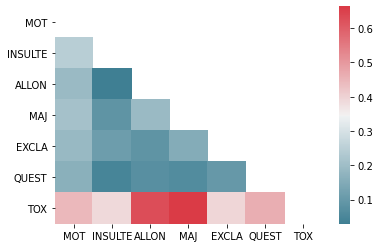

In [ ]:
plot_corr(corr)

On remarque qu'aucune des variable n'a de lien probant les unes avec les autres, ce que nous avions déjà remarqué dans les parties précédentes

En revanche, nous pourrions nous questionner sur la pertinence de notre toxicité : on remarque que le nombre de question moyen par commentaire est plus corréler avec la toxicité que le nombre d'insulte, alors que selon nous pas du tout. 
Nous allons donc changer notre indice de toxicité : donner un poids différent à chaque variable, en donnant un ordre à chaqune. Quel est l'ordre des priorités selon nous ? 1. Insulte, 2. MAJ, 3.EXCLA, 4. ALLON, 5. MOT, 6. QUEST
La somme des poids doit valoir environ avec : 1. 0,3 2. 0,25 3. 0,20 ... jusqu'à 6. 0,05 

In [ ]:
tox2 = pd.read_csv("/content/tox2.csv", sep=';', encoding = 'unicode_escape')
tox2

,MOT,INSULTE,ALLON,MAJ,EXCLA,QUEST,TOX,TOX2
0,1.310117,1.263725,0.706583,2.541088,1.123055,2.542750,1.581220,1.470889
1,0.404064,5.897387,0.000000,0.736039,0.000000,0.000000,1.172915,1.705972
2,1.193370,4.358938,1.451567,0.896048,0.973479,2.089477,1.827147,2.074288
3,0.086585,0.000000,11.128684,2.208117,0.000000,0.000000,2.237231,2.582930
4,1.387246,1.153837,0.967712,1.728092,0.389392,1.392985,1.169877,1.265977
...,...,...,...,...,...,...,...,...
46097,0.230894,0.000000,0.000000,0.000000,1.791202,0.000000,0.337016,0.248388
46098,9.870717,8.846080,22.257369,0.000000,0.000000,5.339776,7.718990,9.891198
46099,1.553123,2.211520,0.000000,0.828044,0.447801,0.000000,0.840081,1.187803
46100,2.539834,0.000000,0.000000,0.000000,3.582404,5.339776,1.910336,1.387179


In [ ]:
corr = tox2.corr()

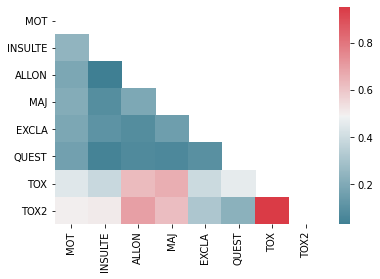

In [ ]:
plot_corr(corr)

In [ ]:
tox2.corr(method = 'pearson')

,MOT,INSULTE,ALLON,MAJ,EXCLA,QUEST,TOX,TOX2
MOT,1.000000,0.246022,0.191381,0.211840,0.189722,0.164161,0.447659,0.501910
INSULTE,0.246022,1.000000,0.029562,0.088727,0.111746,0.045457,0.388699,0.513285
ALLON,0.191381,0.029562,1.000000,0.192410,0.087105,0.074788,0.630812,0.697642
MAJ,0.211840,0.088727,0.192410,1.000000,0.155056,0.066535,0.663104,0.623185
EXCLA,0.189722,0.111746,0.087105,0.155056,1.000000,0.099434,0.395516,0.317318
QUEST,0.164161,0.045457,0.074788,0.066535,0.099434,1.000000,0.464493,0.230356
TOX,0.447659,0.388699,0.630812,0.663104,0.395516,0.464493,1.000000,0.953986
TOX2,0.501910,0.513285,0.697642,0.623185,0.317318,0.230356,0.953986,1.000000


Nous sommes contents de ce nouvel indice de toxicité. En effet, les insultes sont maintenant plus corrélées avec cet indice que précedemment, et les questions presque 2 fois moins !
Nous allons donc continuer avec ce nouvel indice (La video la plus toxique : https://www.youtube.com/watch?v=Bzd1qAb582Q&ab_channel=CNEWS (violence à Nantes et vidéo de combat)

Nous enlevons maintenant l'ancien indice de toxicité pour notre étude de clustering 

In [ ]:
tox3 = tox2.drop( columns = 'TOX')
tox3

,MOT,INSULTE,ALLON,MAJ,EXCLA,QUEST,TOX2
0,1.310117,1.263725,0.706583,2.541088,1.123055,2.542750,1.470889
1,0.404064,5.897387,0.000000,0.736039,0.000000,0.000000,1.705972
2,1.193370,4.358938,1.451567,0.896048,0.973479,2.089477,2.074288
3,0.086585,0.000000,11.128684,2.208117,0.000000,0.000000,2.582930
4,1.387246,1.153837,0.967712,1.728092,0.389392,1.392985,1.265977
...,...,...,...,...,...,...,...
46097,0.230894,0.000000,0.000000,0.000000,1.791202,0.000000,0.248388
46098,9.870717,8.846080,22.257369,0.000000,0.000000,5.339776,9.891198
46099,1.553123,2.211520,0.000000,0.828044,0.447801,0.000000,1.187803
46100,2.539834,0.000000,0.000000,0.000000,3.582404,5.339776,1.387179


In [ ]:
#We are going to compare and trace in 2D Score and GDP per capita because in the box we can see some cluster
tox4 = tox3.drop(['MOT'], axis=1) 
tox5 = tox4.drop(['INSULTE'], axis=1)
tox6 = tox5.drop(['ALLON'], axis=1) 
tox7 = tox6.drop(['MAJ'], axis=1) 
tox8 = tox7.drop(['EXCLA'], axis=1) 
tox9 = tox8.drop(['QUEST'], axis=1) 

range_n_clusters = [2, 3, 4, 5,6]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(tox3) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(tox2, cluster_labels)
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.9420866961151468
For n = 3 Silhouette_score: 0.7627524517153932
For n = 4 Silhouette_score: 0.7596899921793933
For n = 5 Silhouette_score: 0.6480089952871043
For n = 6 Silhouette_score: 0.7037089001987413


Pour vérifier, à titre indicatif, on a bien comme avant un meilleur "Silhouette_score"

In [ ]:
model = KMeans(2).fit(tox3)

In [ ]:
print(model.cluster_centers_)

[[  1.08487096   1.66298225   1.7365677    1.0501389    1.12324096
    1.46497226   1.43161393]
 [  5.36225271   6.69264251  31.95126317 115.47183371   6.92840529
    6.03688672  27.987549  ]]


In [ ]:
X = tox3.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [ ]:
np.mean(X, axis=0), np.var(X, axis=0)

(array([1.09377792, 1.67345571, 1.79948495, 1.28840367, 1.13532928,
        1.47449254, 1.4869124 ]),
 array([ 1.91671494, 15.45095372, 46.36974744, 47.28888242,  8.21820179,
        25.75150485,  6.028098  ]))

In [ ]:
np.mean(X_scaled, axis=0), np.var(X_scaled, axis=0)

(array([ 1.06037352e-16,  1.84948871e-17,  6.10331273e-17, -1.27152348e-17,
        -1.35629172e-17, -2.28103607e-17, -1.41794134e-17]),
 array([1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
pca = PCA().fit(X_scaled[:,:7])

In [ ]:
X_proj = pca.transform(X_scaled[:,:7])

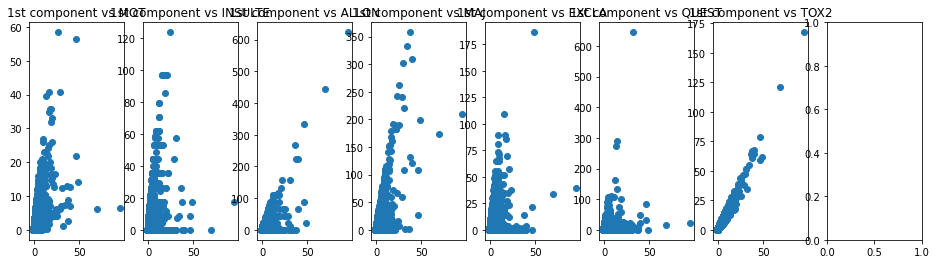

In [ ]:
_, axes = plt.subplots(ncols=8, figsize=(16,4))
for i, (ax, col) in enumerate(zip(axes, ['MOT', 'INSULTE', 'ALLON', 'MAJ',
       'EXCLA', 'QUEST', 'TOX2',])):
    ax.scatter(X_proj[:,0], tox3[col])
    ax.set_title(f'1st component vs {col}')

Pour la première composante, on remarque qu'elle est fortement corrélée avec TOX2

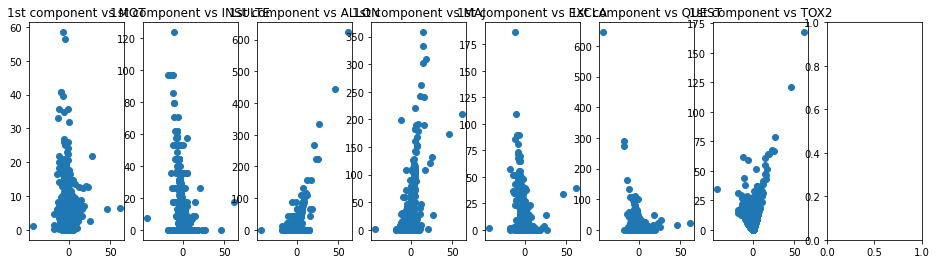

In [ ]:
_, axes = plt.subplots(ncols=8, figsize=(16,4))
for i, (ax, col) in enumerate(zip(axes, ['MOT', 'INSULTE', 'ALLON', 'MAJ',
       'EXCLA', 'QUEST', 'TOX2',])):
    ax.scatter(X_proj[:,1], tox3[col])
    ax.set_title(f'1st component vs {col}')

Quant à la deuxième composante principale, elle est  corrélée (négativement) à le nombre d'insultes.(parasitée par des 0)

(-100.0, 100.0)

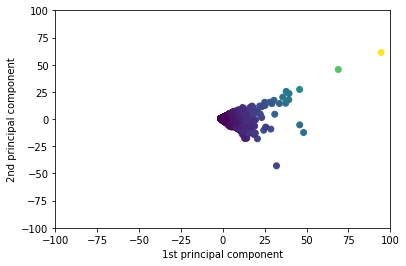

In [ ]:
plt.scatter(X_proj[:,0], X_proj[:,1], c =tox3['TOX2'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.xlim(-100, 100)
plt.ylim(-100, 100)

Ainsi, on voit surtout que les données sont concentrées sur le 0, dû aux nombreux zéros comme expliqué précedemment. 
Nos notes étant obtenues sur 10, nous pourrions effectuer une classification assez simple, mais efficace et logique : 
- Entre 0 et 3.33, la vidéo peut être considérée comme faiblement toxique
- Entre 3.34 et 6.66,la vidéo peut être considérée comme moyennement toxique 
- Entre 6.67 et 10, la vidéo peut être considérée comme fortement toxique

Le score de Silhouette étant supérieur à 0.75, ce choix est pertinent. Nous aurions bien sur pu prendre 2 clusters car le score était très haut, mais autant avoir plus de catégories d'un point de vue utilitaire (plus d'informations avec ces 3 catégories

In [ ]:
tox3['TOXCAT']= np.where(tox3['TOX2'] <= 3.33, "faible",np.where( (tox3['TOX2'] >=3.34 )& (tox3['TOX2'] <=6.66),"moyen","fort"))
tox3

,MOT,INSULTE,ALLON,MAJ,EXCLA,QUEST,TOX2,TOXCAT
0,1.310117,1.263725,0.706583,2.541088,1.123055,2.542750,1.470889,faible
1,0.404064,5.897387,0.000000,0.736039,0.000000,0.000000,1.705972,faible
2,1.193370,4.358938,1.451567,0.896048,0.973479,2.089477,2.074288,faible
3,0.086585,0.000000,11.128684,2.208117,0.000000,0.000000,2.582930,faible
4,1.387246,1.153837,0.967712,1.728092,0.389392,1.392985,1.265977,faible
...,...,...,...,...,...,...,...,...
46097,0.230894,0.000000,0.000000,0.000000,1.791202,0.000000,0.248388,faible
46098,9.870717,8.846080,22.257369,0.000000,0.000000,5.339776,9.891198,fort
46099,1.553123,2.211520,0.000000,0.828044,0.447801,0.000000,1.187803,faible
46100,2.539834,0.000000,0.000000,0.000000,3.582404,5.339776,1.387179,faible


On a ainsi une classification des vidéos en fonction de leur toxicité, divisé en faible,moyen,fort et qui permet, si de nouvelles données sont entrées, de vérifier la toxicité d'une vidéo 

Nous allons maintenant proposer un modèle capable de prédire la toxicité d'une nouvelle vidéo.
Pour cela nous allons séparer notre dataset tox2 (affiché ci-dessus) en une portion train et une portion test.
On détermine ensuite notre colonne de label Y comme la dernière colonne du dataset, c'est à dire TOX2.

In [ ]:
traint=tox2.sample(frac=0.8,random_state=123) #must set a seed value in random_state option 
testt=tox2.drop(traint.index)

In [ ]:
Ytraint = traint.iloc[:, -1] # last column 
Xtraint = traint.iloc[:,:-1] # all columns before the last
Ytestt = testt.iloc[:, -1] # last column 
Xtestt = testt.iloc[:,:-1] # all columns before the last

On applique ici la méthode de KNeighborsRegressor, on entraîne ce modèle sur notre portion train. Et on prédit la portion test à partir de ce modèle entraîné.

In [ ]:
clasKnn = KNeighborsRegressor(n_neighbors=3)
clasKnn.fit(Xtraint, Ytraint)
pred=clasKnn.predict(Xtestt)
pred

array([1.51373417, 1.25346882, 0.14286563, ..., 3.89365994, 8.64869945,
       1.17832956])

In [ ]:
final_mse = mean_squared_error(Ytestt, pred)
final_rmse1 = np.sqrt(final_mse)
final_rmse1

0.38833274183100724

In [ ]:
clasKnn.score(Xtestt, Ytestt)

0.9698796742812434

Notre modèle de prédiction a un score de 0,97, ce qui est très performant. D'après la métrique MSE, on obtient un écart moyen de 0,39 entre l'indice de toxicité prédit et le véritable.

#Conclusion

En somme, nous avons étudié un dataset comportant une multitude de données (27) portant sur les caractéristiques d'une vidéo youtube. Certaines de ces données se sont révelées inutiles (id_video par exemple) et d'autres peu utiles (categ_inst par exemple).

Ces données nous ont permis dans un premier temps de créer plusieurs modèles prédictifs du nombre d'insultes dans une vidéo. Ces modèles (Random Forest, Logistic Regression,...) ont obtenu un score tous relativement proche (entre 0,6 et 0,79). Ces scores nous ont paru plutôt bons mais nous avons essayé d'améliorer la prédiction en créant une nouvelle variable : groupe. Ces groupes englobent un nombre d'insultes (0 à 4 ou encore 100 à 200). Nous avons adapté un de nos modèles (MLP) pour observer l'évolution du score et avons remarqué une nette amélioration de ce score, passant de 0,75 à 0,95. Ainsi, grâce à ce modèle, nous pouvons prédire à partir des variables données une approximation relativement précise du nombre d'insultes qu'une vidéo aura en commentaire.

Par la suite, nous avons élaboré la toxicité d'une vidéo. Par toxicité nous entendons le caractère d'une vidéo pouvant attiser la haine et dans laquelle le débat des commentaires semble peut constructif. Cette toxicité se base, comme énoncé précedemment, sur les moyennes du nombre d'insultes, le nombre de points d'exclamation, etc par commentaire. Chacune de ces variables possède un poids différent en fonction de la pertinence que nous leur avons accordée. Cette toxicité est notée de 0 à 10 : ainsi 3 catégories peuvent se démarquer les unes des autres (toxicité entre 0 et 3,33 , 3,34 à 6,66 et 6,67 à 10).
Nous avons ensuite mis au point un modèle capable de prédire cet indice de toxicité pour notre dataset.